# Graphs for Kirby & Tamariz (2021)

This takes the output of our combinatoriality simulations and creates the publication version of the graphs. The code is copyright (c) 2019-2021 Simon Kirby

In [18]:
import seaborn as sns
import pandas as pd
import pickle

In [21]:
data = pickle.load(open("cultural_evolution_and_design_features_results.p",'rb'))
data = [data[2], data[1], data[0], data[3]]

In [22]:
graphs = pd.DataFrame()

for simulation, res in zip(['no communication',
                            'communication',
                            'learning from learners',
                            'combinatorial homesign'],
                           data):
    graph = pd.DataFrame()
    for j, c in enumerate(['degenerate', 'holistic', 'other', 'combinatorial']):
        for i, d in enumerate(res):
            df = pd.DataFrame([x[j] for x in d], columns=['posterior'])
            df['run'] = [i] * len(d)
            df['generation'] = [x/10 for x in range(len(d))]
            df['language'] = [c] * len(d)
            graph = pd.concat([graph, df])
    graph['simulation'] = [simulation] * len(graph)
    graphs = pd.concat([graphs, graph])

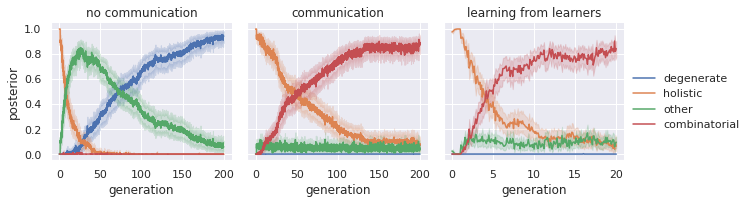

In [24]:
sns.set_theme(style="darkgrid")

g = sns.FacetGrid(graphs[graphs['simulation']!='combinatorial homesign'], col="simulation", sharex=False)

g.map(sns.lineplot, 'generation', 'posterior', 'language')

g.add_legend()
g.set_titles("{col_name}")

In [25]:
g.savefig("combinatoriality_graph_1.pdf")

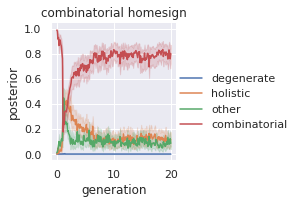

In [26]:
sns.set_theme(style="darkgrid")

g = sns.FacetGrid(graphs[graphs['simulation']=='combinatorial homesign'], col="simulation", sharex=False)

g.map(sns.lineplot, 'generation', 'posterior', 'language')

g.add_legend()
g.set_titles("{col_name}")

In [28]:
g.savefig("combinatoriality_graph_2.pdf")